In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data, color

In [ ]:
image = color.rgb2gray(data.coffee())


In [ ]:
filter = np.array([[-1,-1,-1],
                   [-1,20,-1],
                   [-1,-1,-1]])


In [ ]:
convolved = convolve2d(image,filter,mode='same',boundary = 'symm')

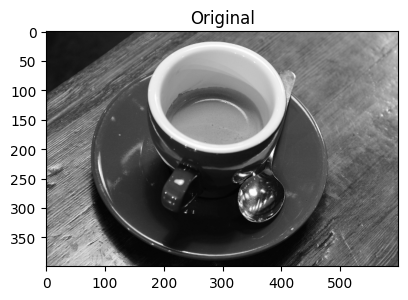

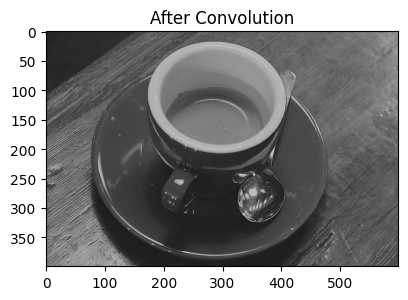

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image,cmap = 'gray')
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
plt.title("After Convolution")
plt.imshow(convolved,cmap = 'gray')

In [ ]:
def max_pooling(feature_map,size = 3,stride =1):
  output_shape = (
      (feature_map.shape[0]-size) // stride + 1,
      (feature_map.shape[1]-size)  // stride + 1
  )
  pooled = np.zeros(output_shape)
  for i in range(0,output_shape[0]):
    for j in range(0,output_shape[1]):
      region = feature_map[i*stride:i*stride + size,j*stride:j*stride+size]
      pooled[i,j] = np.max(region)

  return pooled

In [ ]:
pooled = max_pooling(image,size = 3,stride=2)


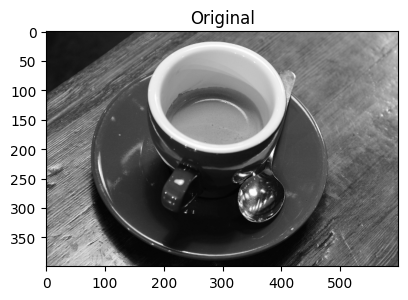

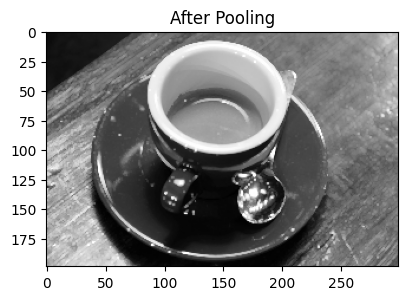

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image,cmap = 'gray')
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
plt.title("After Pooling")
plt.imshow(pooled,cmap = 'gray')

Implementing AlexNet Image Classification Architecture

In [ ]:
from tensorflow.keras import models,layers

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [ ]:
alexnet = models.Sequential([
    layers.Input(shape=(227,227,3)),
    layers.Conv2D(96,kernel_size=11,strides=4,activation='relu'),
    layers.MaxPool2D(pool_size=3,strides=2),

    layers.Conv2D(256,kernel_size=5,padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=3,strides=2),

    layers.Conv2D(384,kernel_size=3,padding='same',activation='relu'),
    layers.Conv2D(384,kernel_size=3,padding='same',activation='relu'),
    layers.Conv2D(256,kernel_size=3,padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=3,strides=2),

    layers.Flatten(),
    layers.Dense(4096,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1000,activation='softmax'),

])

alexnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,378,344 (237.95 MB)

 Trainable params: 62,378,344 (237.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms,models
from torch.utils.data import DataLoader
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/Computer Vision/flowers/train'
val_dir = '/content/drive/MyDrive/Computer Vision/flowers/val'

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(root=train_dir,transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir,transform=transform)

train_loader = DataLoader(train_dataset,batch_size = 16,shuffle=True)
val_loader = DataLoader(val_dataset,batch_size = 16)

In [ ]:
alexnet = models.alexnet(True)

for param in alexnet.parameters():
  param.requires_grad = False

alexnet.classifier[6] = nn.Linear(4096,5)

for param in alexnet.classifier[6].parameters():
  param.requires_grad = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

alexnet = alexnet.to(device)



/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:03<00:00, 62.6MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=alexnet.parameters(),lr = 0.001)

In [ ]:
def train_model(model, criterion, optimizer, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        train_correct = 0
        train_total = 0
        running_loss = 0.0

        print(f"\nEpoch {epoch + 1}/{epochs}")
        print("-" * 30)

        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            batch_correct = (preds == labels).sum().item()
            train_correct += batch_correct
            train_total += labels.size(0)


            if (i + 1) % 10 == 0:
                batch_acc = batch_correct / labels.size(0)
                print(f"[Batch {i+1}/{len(train_loader)}] Loss: {loss.item():.4f}, Batch Acc: {batch_acc:.4f}")

        train_acc = train_correct / train_total
        print(f"Epoch {epoch+1} Summary - Loss: {running_loss:.4f}, Train Accuracy: {train_acc:.4f}")

        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_acc = val_correct / val_total

        print(f"Validation Accuracy: {val_acc:.4f}")


In [ ]:
train_model(alexnet, criterion, optimizer, train_loader, val_loader)


Epoch 1/10
------------------------------
[Batch 10/251] Loss: 1.0230, Batch Acc: 0.6250
[Batch 20/251] Loss: 0.4732, Batch Acc: 0.8125
[Batch 30/251] Loss: 0.6680, Batch Acc: 0.7500
[Batch 40/251] Loss: 1.1499, Batch Acc: 0.7500
[Batch 50/251] Loss: 1.0586, Batch Acc: 0.7500
[Batch 60/251] Loss: 0.8363, Batch Acc: 0.6250
[Batch 70/251] Loss: 0.9353, Batch Acc: 0.6875
[Batch 80/251] Loss: 0.9496, Batch Acc: 0.7500
[Batch 90/251] Loss: 0.4661, Batch Acc: 0.8750
[Batch 100/251] Loss: 0.9258, Batch Acc: 0.7500
[Batch 110/251] Loss: 1.0148, Batch Acc: 0.6250
[Batch 120/251] Loss: 0.7051, Batch Acc: 0.7500
[Batch 130/251] Loss: 0.8164, Batch Acc: 0.7500
[Batch 140/251] Loss: 1.0312, Batch Acc: 0.7500
[Batch 150/251] Loss: 0.4361, Batch Acc: 0.8750
[Batch 160/251] Loss: 0.7955, Batch Acc: 0.7500
[Batch 170/251] Loss: 0.3357, Batch Acc: 0.9375
[Batch 180/251] Loss: 1.3651, Batch Acc: 0.5000
[Batch 190/251] Loss: 0.9740, Batch Acc: 0.5625
[Batch 200/251] Loss: 0.4290, Batch Acc: 0.8125
[Batch